# Two-Sample Tests

## I. Two-Sample Z-Test

**The conditions for two-sample z-test include:** 
- Samples are randomly selected
- Two sets of data/samples are independent from one another 
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)
- Comparision of means from two different populations 
- Population variances are known 
- Sample sizes are large (i.e., n $\geq$ 30)

The formula for the two-sample Z-test is:

$$
Z(cal.) = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\left(\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}\right)}}
$$

Where:

$\bar{x}_1$ and $\bar{x}_2$ are the sample means of population 1 and population 2, respectively

$\sigma_1$ and $\sigma_2$ are the standard deviations of population 1 and population 2, respectively 

$n_1$ and $n_2$ are the sample sizes of population 1 and population 2, respectively

### *Two-Sample Z-Test (Two-Tailed Test)*

**Question:** Two machines produce perfume bottles, and 100 samples were drawn from each. Bottles from Machine 1 had a mean volume of 151.2 and a standard deviation of 2.1. Bottles from Machine 2 had a mean volume of 151.9 and a standard deviation of 2.2. Is there a difference in the mean volumes of bottles produced by these two machines? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats

**Loading Data**

In [2]:
# Reading data as df
df = pd.read_csv('Two Machines.csv')

In [3]:
# Checking the head of the dataFrame
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


In [4]:
# Checking the describe() method to see statistical summary of the numerical column of the dataset
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


In [5]:
# Checking the info(method)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


**Visualizing Data**

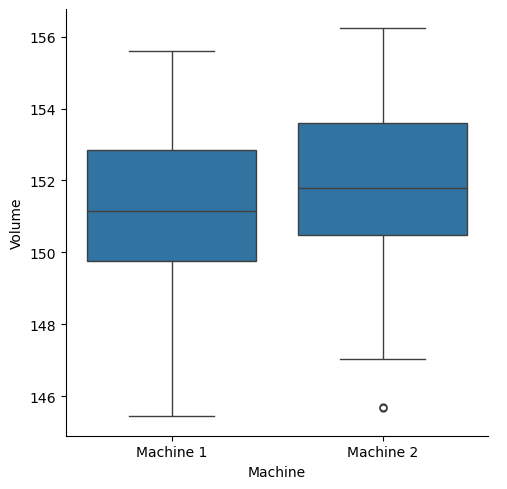

In [6]:
# Plotting box and whisker plots
sns.catplot(data=df, x='Machine', y='Volume', kind='box')

In [7]:
# Filtering the data in the Volume column according to the machine types (i.e. Machine 1 and Machine 2).
m1 = df[df['Machine'] == 'Machine 1']['Volume'] # For Machine 1
m2 = df[df['Machine'] == 'Machine 2']['Volume'] # For Machine 2

**Stating Hypothesis**

Null hypothesis H0: $\mu_1$ = $\mu_2$ or $\mu_1$ - $\mu_2$ = 0 (The mean volume of bottles produced by Machine 1 is equal to the mean volume of bottles produced by Machine 2)

Alternative hypothesis H1: $\mu_1$ $\neq$ $\mu_2$ or $\mu_1$ - $\mu_2$ $\neq$ 0 (The mean volume of bottles produced by Machine 1 is not equal to the mean volume of bottles produced by Machine 2)

Here, $\mu_1$  and $\mu_2$ refer to the true but unknown population means we are testing.

**Selecting the Level of Significance or α Level**

Given a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). For a two-tailed test, the significance level is split equally between both tails, resulting in α/2 = 0.025 for each tail.

**Calculating Test Statistic and P-Value**

In [8]:
weightstats.ztest(x1=m1, x2=m2, alternative='two-sided')
# Here, weightstats library is mainly used for testing one-sample or two-sample means

(-2.189406040190184, 0.028567341032618248)

Here, calculated test statistic (Z cal) is -2.18 and the two-tailed p-value associated with Z cal = -2.18 is 0.028.

**Interpreting Results**

Since the p-value is less than α (0.05), we reject the null hypothesis. Therefore, we conclude that the mean volume of bottles produced by Machine 1 significantly differ from the mean volume of bottles produced by Machine 2.

### A t-test is also an alternative to a z-test when the sample size is large

A t-distribution approaches the z-distribution (or a standard normal distribution) when the sample size increases.

**Let’s check this by performing a t-test using the scipy.stats module.**

In [9]:
# For Two-Tailed Test
stats.ttest_ind(m1, m2, equal_var=True, alternative='two-sided')

TtestResult(statistic=-2.189406040190184, pvalue=0.029736299645472124, df=198.0)

Here, the t-test yields similar results to the two-sided z-test conducted above.

## II. Two-Sample T-Test

**The conditions for two-sample t-test include:**
- Samples are randomly selected
- **Two sets of data/samples are independent from one another**
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)
- Comparision of means from two different populations
- Population variances are unknown 
- Sample sizes are small (i.e., n $\lt$ 30)

### Case I: Equal Variances Assumed

The test statistic formula for two-sample t-test (with equal variances assumed) is:

$$
t(cal.) = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\left(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2} \right)}}
$$

Where:

$\bar{x}_1$ and $\bar{x}_2$ are the sample means of population 1 and population 2, respectively 

$n_1$ and $n_2$ are the sample sizes of population 1 and population 2, respectively

$s_p$ is the pooled standard deviation 

Here, the pooled variance formula for two-sample t-test (with equal variances assumed) is:

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

Where:

$s_p^2$ = pooled variance

$s_1^2$ = variance of sample 1

$s_2^2$ = variance of sample 2

$n_1$ = size of sample 1

$n_2$ = size of sample 2

The formula for degrees of freedom (df) in a two-sample t-test with equal variances assumed is:

Degrees of freedom (df) = $n_1 + n_2 -2$

### Case II: Unequal Variances Assumed

The test statistic formula for two-sample t-test (with unequal variances assumed) is:

$$
t(cal.) = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)}}
$$

Where:

- $\bar{x}_1$ and $\bar{x}_2$ are the sample means of population 1 and population 2, respectively

- $s_1$ and $s_2$ are the sample standard deviations of population 1 and population 2, respectively

- $n_1$ and $n_2$ are the sample sizes of population 1 and population 2, respectively

The formula for degrees of freedom (df) in a two-sample t-test with unequal variances (also known as Welch's t-test) is:

$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$

Where:

$s_1^2$ and $s_2^2$ are the sample variances

$n_1$ and $n_2$ are the sample sizes

### *Two-Sample T-Test (Two-Tailed Test): Equal Variances Assumed*

**Question:** Five samples were collected from bottles produced by each of Machines A and B. The volumes of bottles (in cc) from Machine A were 150, 152, 154, 152, and 151, while those from Machine B were 156, 155, 158, 155, and 154. Is there a  difference in the mean volumes of bottles produced by these two machines? Perform a hypothesis test at the 95% confidence level, assuming equal variances.

**Importing Libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Creating Data**

In [11]:
m_a = [150, 152, 154, 152, 151] # data showing the volules of bottles produced by machine A 
m_b = [156, 155, 158, 155, 154] # data showing the volules of bottles produced by machine B

**Visualizing Data**

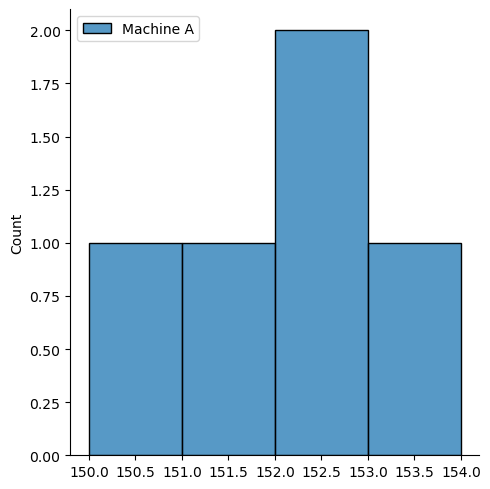

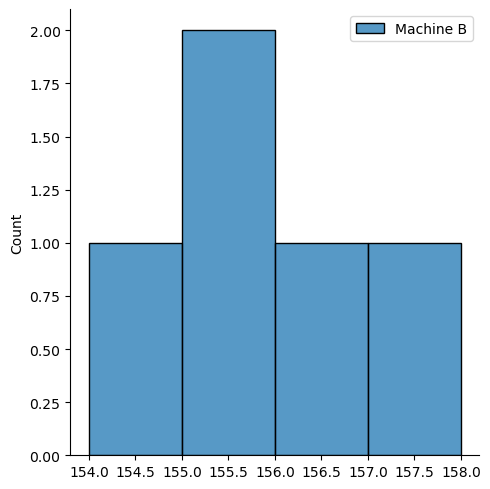

In [12]:
# Plotting histograms
sns.displot(data=m_a, label= 'Machine A')
plt.legend()
sns.displot(data=m_b, label= 'Machine B')
plt.legend();

**Stating Hypothesis**

Null hypothesis H0: $\mu_A$ = $\mu_B$ or $\mu_A$ - $\mu_B$ = 0 (The mean volume of bottles produced by Machine A is equal to that produced by Machine B)

Alternative hypothesis H1: $\mu_A$ $\neq$ $\mu_B$ or $\mu_A$ - $\mu_B$ $\neq$ 0 (The mean volume of bottles produced by Machine A is not equal to that produced by Machine B)

Here, $\mu_A$  and $\mu_B$ refer to the true but unknown population means we are testing.

**Selecting the Level of Significance or α Level**

Given a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). For a two-tailed test, the significance level is split equally between both tails, resulting in α/2 = 0.025 for each tail.

**Calculating Test Statistic and P-Value**

In [13]:
stats.ttest_ind(m_a, m_b, equal_var=True, alternative='two-sided')

TtestResult(statistic=-4.005551702879929, pvalue=0.003919295477128331, df=8.0)

**Interpreting Results**

Since the p-value is less than α (0.05), we reject the null hypothesis. Therefore, we conclude that the mean volume of bottles produced by Machine A significantly differ from the mean volume of bottles produced by Machine B.

### *Two-Sample T-Test (Two-Tailed Test): Unequal Variances Assumed*

**Question:** Five samples were collected from bottles produced by each of Machines A and C. The volumes of bottles (in cc) from Machine A were 150, 152, 154, 152, and 151, while those from Machine C were 144, 162, 177, 150, and 140. Is there a  difference in the mean volumes of bottles produced by these two machines? Perform a hypothesis test at the 95% confidence level, assuming unequal variances.

**Creating Data**

In [14]:
m_a = [150, 152, 154, 152, 151] # data showing the volules of bottles produced by machine A
m_c = [144, 162, 177, 150, 140] # data showing the volules of bottles produced by machine C

**Visualizing Data**

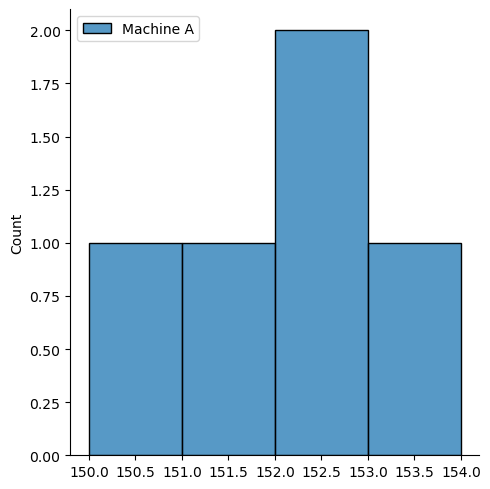

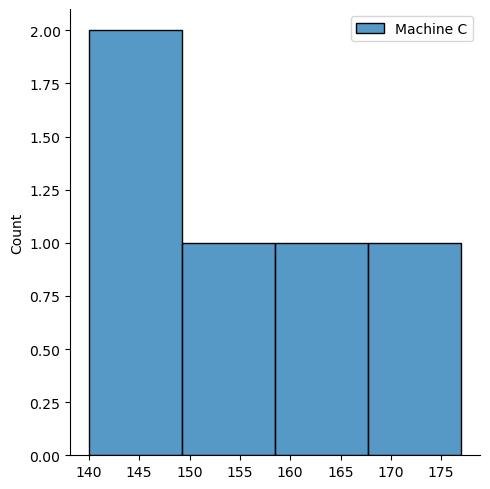

In [15]:
# Plotting histograms
sns.displot(data=m_a, label='Machine A')
plt.legend()
sns.displot(data=m_c, label='Machine C')
plt.legend();

**Stating Hypothesis**

Null hypothesis H0: $\mu_A$ = $\mu_C$ or $\mu_A$ - $\mu_C$ = 0 (The mean volume of bottles produced by Machine A is equal to that produced by Machine C)

Alternative hypothesis H1: $\mu_A$ $\neq$ $\mu_C$ or $\mu_A$ - $\mu_C$ $\neq$ 0 (The mean volume of bottles produced by Machine A is not equal to that produced by Machine C)

Here, $\mu_A$  and $\mu_C$ refer to the true but unknown population means we are testing.

**Selecting the Level of Significance or α Level**

Given a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). For a two-tailed test, the significance level is split equally between both tails, resulting in α/2 = 0.025 for each tail.

**Calculating Test Statistic and P-Value**

In [16]:
stats.ttest_ind(m_a, m_c, equal_var=False, alternative='two-sided')

TtestResult(statistic=-0.4146442144313621, pvalue=0.699289145758865, df=4.077937685622884)

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the mean volume of bottles produced by Machine A does not differ significantly from that produced by Machine C.

## III. Paired T-Test

**The conditions for paired t-test include:**
- Samples are randomly selected
- **Two sets of data/samples are dependent on one another**
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)
- Comparision of means from two different populations
- Population variances are unknown 
- Sample sizes are small (i.e., n $\lt$ 30)

The formula for the paired t-test is:

$$
t(cal.) = \frac{ \bar{x}_d - \mu_0}{s_d / \sqrt{n}}
$$

Where:

$\bar{x}_d$ = the sample mean of the differences

$\mu_0$ = Population mean (hypothesized)

$s_d$ = the sample standard deviation of the differences

$n$ = sample size (i.e. the number of paired observations)

### *Paired T-Test (Two-Tailed Test)*

**Question:** To test the effectiveness of a drug developed by a pharmaceutical company in controlling blood pressure, blood samples from five individuals were collected both before and after using the drug, and their blood pressure was measured. Is there a difference in blood pressure before and after taking the drug? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Creating Data**

In [18]:
bp_before = [120, 122, 143, 100, 109] # Data showing the blood pressure of the patients before using the drug
bp_after = [122, 120, 141, 109, 109] # Data showing the blood pressure of the patients after using the drug

**Visualizing Data**

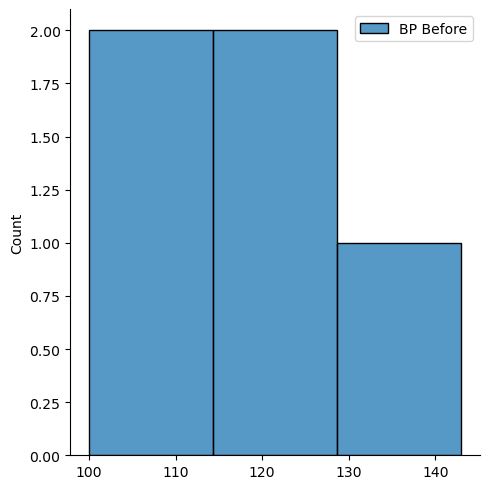

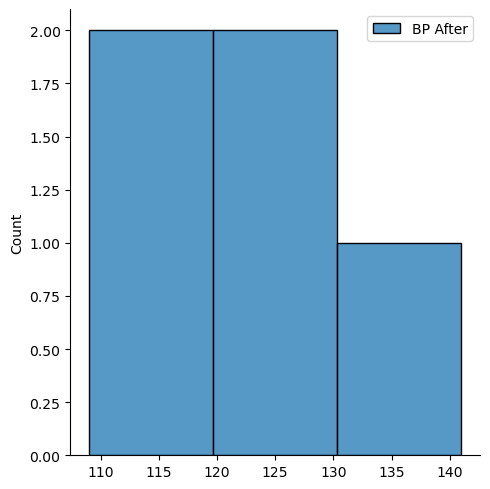

In [19]:
# Plotting histograms
sns.displot(data=bp_before, label='BP Before', bins=3)
plt.legend()
sns.displot(data=bp_after, label='BP After', bins=3)
plt.legend();

**Stating Hypothesis**

Null hypothesis H0: $\mu_{Bef}$ = $\mu_{Aft}$ or $\mu_{Bef}$ - $\mu_{Aft}$ = 0 (The mean blood pressure before using the drug is equal to the mean blood pressure after using the drug)

Alternative hypothesis H1: $\mu_{Bef}$ $\neq$ $\mu_{Aft}$ or $\mu_{Bef}$ - $\mu_{Aft}$ $\neq$ 0 (The mean blood pressure before using the drug is not equal to the mean blood pressure after using the drug)

Here, $\mu_{Bef}$  and $\mu_{Aft}$ refer to the true but unknown population means we are testing.

**Selecting the Level of Significance or α Level**

Given a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). For a two-tailed test, the significance level is split equally between both tails, resulting in α/2 = 0.025 for each tail.

**Calculating Test Statistic and P-Value**

In [20]:
stats.ttest_rel(bp_before, bp_after, alternative='two-sided')

TtestResult(statistic=-0.6864064729836442, pvalue=0.5301776477578163, df=4)

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the mean blood pressure before using the drug does not differ significantly from that after using the drug.

## IV. Two-Sample Proportion Test

**The conditions for one-sample proportion test include:** 
- Samples are randomly selected
- Two sets of data/samples are independent from one another
- The data from each sample has only 2 categories (or 2 possible outcomes), such as yes/no or pass/fail
- Comparision of proportions from two different populations 

**However, we usually conduct this test by approximating a binomial distribution with a normal distribution.** A key condition for this is that the data from each sample should include at least 10 successes (i.e., $n\ p_0$ $\geq$ 10) and 10 failures (i.e., n (1 - $\ p_0$) $\geq$ 10). **Some sources, however, suggest a minimum of 5 successes and 5 failures instead.**

### 'Two-Proportion Z-Test' For Two-Sample Proportion Test

**Pooled Proportion Method:** When we are testing for no difference between two population proportions—under the null hypothesis, and assuming normality in both population datasets—we use the pooled proportion method.

The formula for the two-proportion z-statistic using the **Pooled Proportion** approach is:

$$
z(cal.) = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Where:

$\hat{p}_1$ = Sample proportion in the first sample

$\hat{p}_2$ = Sample proportion in the second sample

$n_1$ =  Size of the first sample

$n_2$ = Size of the second sample

$\hat{p}$ = Pooled or combined proportion 


The formula to calculate the *pooled proporton* is:

$$\hat{p} = {\frac{{n_1 \hat{p}_1 + n_2 \hat{p}_2}}{n_1 + n_2}}\  or \  {\frac{x_1 + x_2}{n_1 + n_2}} $$ 

Where:

$x_1$ = the count/number of successes in the first sample = $n_1 \hat{p}_1$

$x_2$ = the count/number of successes in the second sample = $n_2 \hat{p}_2$

### *Two-Sample Proportion Test (Two-Tailed Test)*

**Question:** We tested 200 items from Vendor A and found 30 defective. From Vendor B, we tested 100 items and found 10 defective. Is there a significant difference in the proportion of defective items between these two vendors? Perform a hypothesis test at the 95% confidence level.

**Importing Libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import proportion

**Loading/Creating Data**

Here, we are neither loading nor creating data, as we are directly using the data provided in the question above.”

**Stating Hypothesis**

Null hypothesis H0: $p_1$ = $p_2$ or $p_1$ - $p_2$ = 0 (The proportion of defective items from Vendor A is equal to that from Vendor B)

Alternative hypothesis H1: $p_1$ $\neq$ $p_2$ or $p_1$ - $p_2$ $\neq$ 0 (The proportion of defective items from Vendor A is not equal to that from Vendor B)

Here, $p_1$ and $p_2$ refer to the true but unknown population proportions we are testing.

**Selecting the Level of Significance or α Level**

Given a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). For a two-tailed test, the significance level is split equally between both tails, resulting in α/2 = 0.025 for each tail.

**Calculating Test Statistic and P-Value**

Here, we compare two independent proportions using the 'proportion.test_proportions_2indep' function, which performs a z-test. This test relies on the z-distribution to compute the p-value and serves as an approximation of the binomial distribution.

In [22]:
proportion.test_proportions_2indep(count1=30, nobs1=200, count2=10, nobs2=100, method='score')
# Here, 'alternative = two-sided' is the default test type

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.1989578808281796
pvalue = 0.2305443235633593
compare = 'diff'
method = 'score'
variance = 0.001739130434782609
alternative = 'two-sided'
prop1_null = 0.13333333333333333
prop2_null = 0.13333333333333333
tuple = (1.1989578808281796, 0.2305443235633593)
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
value = 0

Here, calculated test statistic (Z cal) is 1.19 and the two-tailed p-value associated with Z cal = 1.19 is 0.230.

**Interpreting Results**

Since the p-value is greater than α = 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the proportion of defective items from Vendor A does not differ significantly from that of Vendor B.

## V. Two-Sample Variance Test

**The conditions for two-sample variance test include:** 
- Samples are randomly selected
- Two sets of data/samples are independent from one another
- Comparision of variances from two different populations
- Sampling distribution approximates normal distribution (or, the data follows a normal distribution)

Since neither 'scipy.stats' nor 'statsmodels.stats' includes a built-in test for variance, we need to manually calculate the F-statistic to compare two variances using the formula:

$$
F(cal.) = \frac{\ s_1^2}{\ s_2^2}
$$

Where:

$\ s_1^2$ is the variance of the first sample (larger variance is typically placed in the numerator)

$\ s_2^2$ is the variance of the second sample

**Question:** We collected 8 bottle samples from Machine A with a standard deviation of 1.1 of the bottle volume, and 5 samples of bottles from Machine B with a variance of 11 in the bottle volume. At the 90% confidence level, can we conclude that there is a significant difference between the variances of the bottle volumes produced by two machines?

**Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f

**Stating Hypothesis**

Null hypothesis H0: $\sigma_1^2$ = $\sigma_1^2$ (The sample variance of Machine A is equal to the sample variance of Machine B)

Alternative hypothesis H1: $\sigma_1^2$ $\neq$ $\sigma_1^2$ (The sample variance of Machine A is not equal to the sample variance of Machine B)

**Selecting the Level of Significance or α Level**

Given that the confidence level (1 - α) is 90%, the significance level (α) is 10% (or 0.10). Therefore, for a two-tailed test, the significance level for each tail is α/2 = 0.05.

**Calculating F-Test Statistic**

In [24]:
# Larger variance is typically placed in the numerator)
F_cal = 11/(1.1**2)
F_cal

9.09090909090909

**Finding Critical F-Values**

In [25]:
# Calulating the right critical value
f.isf(q=0.05, dfn=4, dfd=7)

4.120311726897633

In [26]:
# Calulating the Left critical value
f.isf(q=0.95, dfn=4, dfd=7)

0.1640901524729093

**Interpreting Results**

Here, the calculated F-value of 9.09 falls in the rejection region—that is, it lies outside the range between the lower critical F-value (0.16) and the upper critical F-value (4.12) of the F-distribution. Therefore, we reject the null hypothesis at the 𝛼 = 0.10 level and conclude that the sample variance of Machine A significantly differs from the sample variance of Machine B.

### *'Bartlett's Test' For Two-Sample Variance Test*

Bartlett's Test is used to test equality of variances. This test is based on the statistic whose sampling distribution is approximately a Chi-Square distribution with (k − 1) degrees of freedom, where k is the number of random samples, which may vary in size and are each drawn from independent normal distributions. If we have strong evidence that our data come from a normal, or nearly normal, distribution, then Bartlett's test is a better option.

***Let's perform Bartlett's Test and Levene's Test using a new set of data.***

In [27]:
v1 = [150, 150, 151, 148, 151, 152, 149, 150] # Creating data showing bottle volumes from machine A
np.std(v1)

1.165922381636102

In [28]:
v2 = [135, 152, 154, 169, 157] # Creating data showing bottle volumes from machine B
np.std(v2)

10.9288608738514

In [29]:
stats.bartlett(v1, v2)

BartlettResult(statistic=19.105727631632714, pvalue=1.2367317910523616e-05)

Since the p-value is less than α = 0.05, we reject the null hypothesis — just as in the previous question — and conclude that the two variances differ significantly from one another.

### *'Levene's Test' For Two-Sample Variance Test*

Levene's test is a highly robust method for assessing the equality of variances, as it makes minimal assumptions about the data distribution and performs well across various data types. When the normality assumption of the data is questionable, the more robust Levene's test can be applied directly.

In [30]:
stats.levene(v1, v2)

LeveneResult(statistic=5.416245804750017, pvalue=0.040060452607943706)

Since the p-value is less than α = 0.05, we reject the null hypothesis — just as in the previous question — and conclude that the two variances differ significantly from one another.